In [5]:
from __future__ import division
from __future__ import unicode_literals
from __future__ import absolute_import
import pandas as pd
import numpy as np
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from rdkit.Avalon.pyAvalonTools import GetAvalonFP
import rdkit.rdBase
from rdkit.Chem.MACCSkeys import GenMACCSKeys
from rdkit import DataStructs
from rdkit.DataStructs import BitVectToText
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors as Descriptors
from rdkit.Chem.EState import Fingerprinter
from rdkit.ML.Descriptors import MoleculeDescriptors

from rdkit.Chem import PandasTools as PandasTools
from rdkit.Chem import Descriptors as Descriptors

import matplotlib.pyplot as plt

from scipy.stats import randint
from numpy import argmax
from scipy import stats

In [6]:
from sklearn.metrics import cohen_kappa_score

In [7]:
import sklearn
sklearn.__version__

'1.1.1'

In [8]:
from collections import Counter
from sklearn.metrics import cohen_kappa_score

# Concordance of Train data with each other (with DILI compounds)

In [9]:
#train_data= pd.read_csv("../Train_data_liv_tox_18825.csv")
#test_data= pd.read_csv("../Test_data_DILIst_1275.csv")

train_data= pd.read_csv("../../data/Livtox_withoverlapcompounds_DILI.csv")
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,C=CCOc1ccc(CC(=O)O)cc1Cl,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
2,CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
3,O=C(O)CCCCCCNC1c2ccccc2CCc2ccccc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
4,O=C(O)COc1nn(Cc2ccccc2)c2ccccc12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
...,...,...,...,...
18674,COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...,0,16,Reactive Metabolite Mazzolari et al
18675,CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...,0,16,Reactive Metabolite Mazzolari et al
18676,C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...,0,16,Reactive Metabolite Mazzolari et al
18677,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,0,16,Reactive Metabolite Mazzolari et al


In [10]:
test_data= pd.read_csv("../Test_data_DILIst_1275.csv")[["smiles_r","TOXICITY","Source_rank","Source"]]
test_data["Source_rank"] = "DILI"
test_data

,smiles_r,TOXICITY,Source_rank,Source
0,CCN(CC)c1cc(C)nc2ncnn12,1,DILI,DILIst Classification
1,CCN(CC)CC(=O)Oc1ccc(NC(C)=O)cc1,1,DILI,DILIst Classification
2,CCN(CC)Cc1cc(Nc2ccnc3cc(Cl)ccc23)ccc1O,1,DILI,DILIst Classification
3,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,1,DILI,DILIst Classification Oral
4,CCN(CC)CCN1C(=O)CN=C(c2ccccc2F)c2cc(Cl)ccc21,1,DILI,DILIst Classification Oral
...,...,...,...,...
1270,O=C(N[C@@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)...,0,DILI,DILIrank dataset CP Overlap REpsilber
1271,C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...,0,DILI,DILIrank dataset CP Overlap REpsilber
1272,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,0,DILI,DILIrank dataset CP Overlap REpsilber
1273,CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3,0,DILI,DILIrank dataset CP Overlap REpsilber


In [11]:
#For this excercise we have NOT removed compounds that are also present in the DILI dataset
train_data = train_data[~train_data.Source_rank.isin([4, 9, 12])].reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,C=CCOc1ccc(CC(=O)O)cc1Cl,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
2,CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
3,O=C(O)CCCCCCNC1c2ccccc2CCc2ccccc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
4,O=C(O)COc1nn(Cc2ccccc2)c2ccccc12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
...,...,...,...,...
18674,COC[C@H]1OC(=O)c2coc3c2[C@@]1(C)C1=C(C3=O)[C@@...,0,16,Reactive Metabolite Mazzolari et al
18675,CCOC(=O)CN[C@@H](C(=O)N1CC[C@H]1C(=O)NCc1ccc(/...,0,16,Reactive Metabolite Mazzolari et al
18676,C=C(C)[C@@]12OC3(/C=C/C=C/CCCCC)O[C@@H]1[C@@H]...,0,16,Reactive Metabolite Mazzolari et al
18677,O=C1Cc2cc(CCN3CCN(c4nsc5ccccc45)CC3)c(Cl)cc2N1,0,16,Reactive Metabolite Mazzolari et al


In [12]:
train_data = pd.concat([train_data, test_data]).reset_index(drop=True)
train_data

,smiles_r,TOXICITY,Source_rank,Source
0,C[C@H](N)C(=O)N[C@@H](C)C(=O)NC1[C@@H]2CN(c3nc...,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
1,C=CCOc1ccc(CC(=O)O)cc1Cl,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
2,CCCN(CCC)C(=O)Cc1c(-c2ccc(Cl)cc2)nc2ccc(Cl)cn12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
3,O=C(O)CCCCCCNC1c2ccccc2CCc2ccccc21,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
4,O=C(O)COc1nn(Cc2ccccc2)c2ccccc12,1,2,"Liver Toxicity Knowledge Base (LTKB), prescrip..."
...,...,...,...,...
19949,O=C(N[C@@H](CO)[C@H](O)c1ccc([N+](=O)[O-])cc1)...,0,DILI,DILIrank dataset CP Overlap REpsilber
19950,C[C@H]1O[C@@H](O[C@H]2[C@@H](O)C[C@H](O[C@H]3[...,0,DILI,DILIrank dataset CP Overlap REpsilber
19951,C=C1/C(=C\C=C2/CCC[C@@]3(C)[C@H]2CC[C@@H]3[C@H...,0,DILI,DILIrank dataset CP Overlap REpsilber
19952,CCC(=O)NCC[C@@H]1CCc2ccc3c(c21)CCO3,0,DILI,DILIrank dataset CP Overlap REpsilber


In [13]:
for i in train_data.Source_rank.unique():

 if (len(train_data[train_data["Source_rank"]==2]) != len(train_data[train_data["Source_rank"]==2].smiles_r.unique())):
    print(i)

In [14]:
all_sources_list = [ 2,  3,  5,  6,  7,  8,  10, 11, 14, 15, 16, "DILI"]
all_sources_list

[2, 3, 5, 6, 7, 8, 10, 11, 14, 15, 16, 'DILI']

In [15]:
list_of_kappa=[]

for i in all_sources_list:
    for j in all_sources_list:
        
        df1 = train_data[train_data["Source_rank"]==i][["smiles_r","TOXICITY"]].drop_duplicates(keep=False).reset_index(drop=True)
        df1 = df1.rename(columns={"TOXICITY": "TOXICITY_1"})
        df2 = train_data[train_data["Source_rank"]==j][["smiles_r","TOXICITY"]].drop_duplicates(keep=False).reset_index(drop=True)
        df2 = df2.rename(columns={"TOXICITY": "TOXICITY_2"})
        
        merged_df = pd.merge(df1, df2, on="smiles_r").reset_index(drop=True)
        size = len(merged_df)
        print(size)

        labeler1 = merged_df.TOXICITY_1.to_list()
        labeler2 = merged_df.TOXICITY_2.to_list()
        kappa_score = cohen_kappa_score(labeler1, labeler2)
        
        row= [i, j ,size, kappa_score ]
        list_of_kappa.append(row)
        

286
193
19
9
142
142
64
126
151
124
44
183
193
2170
73
69
1709
550
160
623
580
744
144
588
19
73
663
142
189
63
23
56
33
379
44
61
9
69
142
804
257
56
18
58
33
340
37
66
142
1709
189
257
3249
428
143
494
526
1143
202
499
142
550
63
56
428
1770
105
711
249
311
93
540
64
160
23
18
143
105
282
126
126
97
32
139
126
623
56
58
494
711
126
1217
313
323
79
661
151
580
33
33
526
249
126
313
1175
410
112
412
124
744
379
340
1143
311
97
323
410
6459
222
348
44
144
44
37
202
93
32
79
112
222
604
102
183
588
61
66
499
540
139
661
412
348
102
1275


In [16]:
results_kappa1  = pd.DataFrame(list_of_kappa, columns=["i", "j", "size", "cohen_kappa_score"])
results_kappa1

,i,j,size,cohen_kappa_score
0,2,2,286,1.000000
1,2,3,193,0.501589
2,2,5,19,-0.075472
3,2,6,9,-0.188679
4,2,7,142,0.540910
...,...,...,...,...
139,DILI,11,661,0.481083
140,DILI,14,412,0.077392
141,DILI,15,348,0.039987
142,DILI,16,102,0.184416


In [17]:
annot = results_kappa1["size"].to_numpy()
annot = annot.reshape(12,12)
annot

array([[ 286,  193,   19,    9,  142,  142,   64,  126,  151,  124,   44,
         183],
       [ 193, 2170,   73,   69, 1709,  550,  160,  623,  580,  744,  144,
         588],
       [  19,   73,  663,  142,  189,   63,   23,   56,   33,  379,   44,
          61],
       [   9,   69,  142,  804,  257,   56,   18,   58,   33,  340,   37,
          66],
       [ 142, 1709,  189,  257, 3249,  428,  143,  494,  526, 1143,  202,
         499],
       [ 142,  550,   63,   56,  428, 1770,  105,  711,  249,  311,   93,
         540],
       [  64,  160,   23,   18,  143,  105,  282,  126,  126,   97,   32,
         139],
       [ 126,  623,   56,   58,  494,  711,  126, 1217,  313,  323,   79,
         661],
       [ 151,  580,   33,   33,  526,  249,  126,  313, 1175,  410,  112,
         412],
       [ 124,  744,  379,  340, 1143,  311,   97,  323,  410, 6459,  222,
         348],
       [  44,  144,   44,   37,  202,   93,   32,   79,  112,  222,  604,
         102],
       [ 183,  588,  

cohen_kappa_score


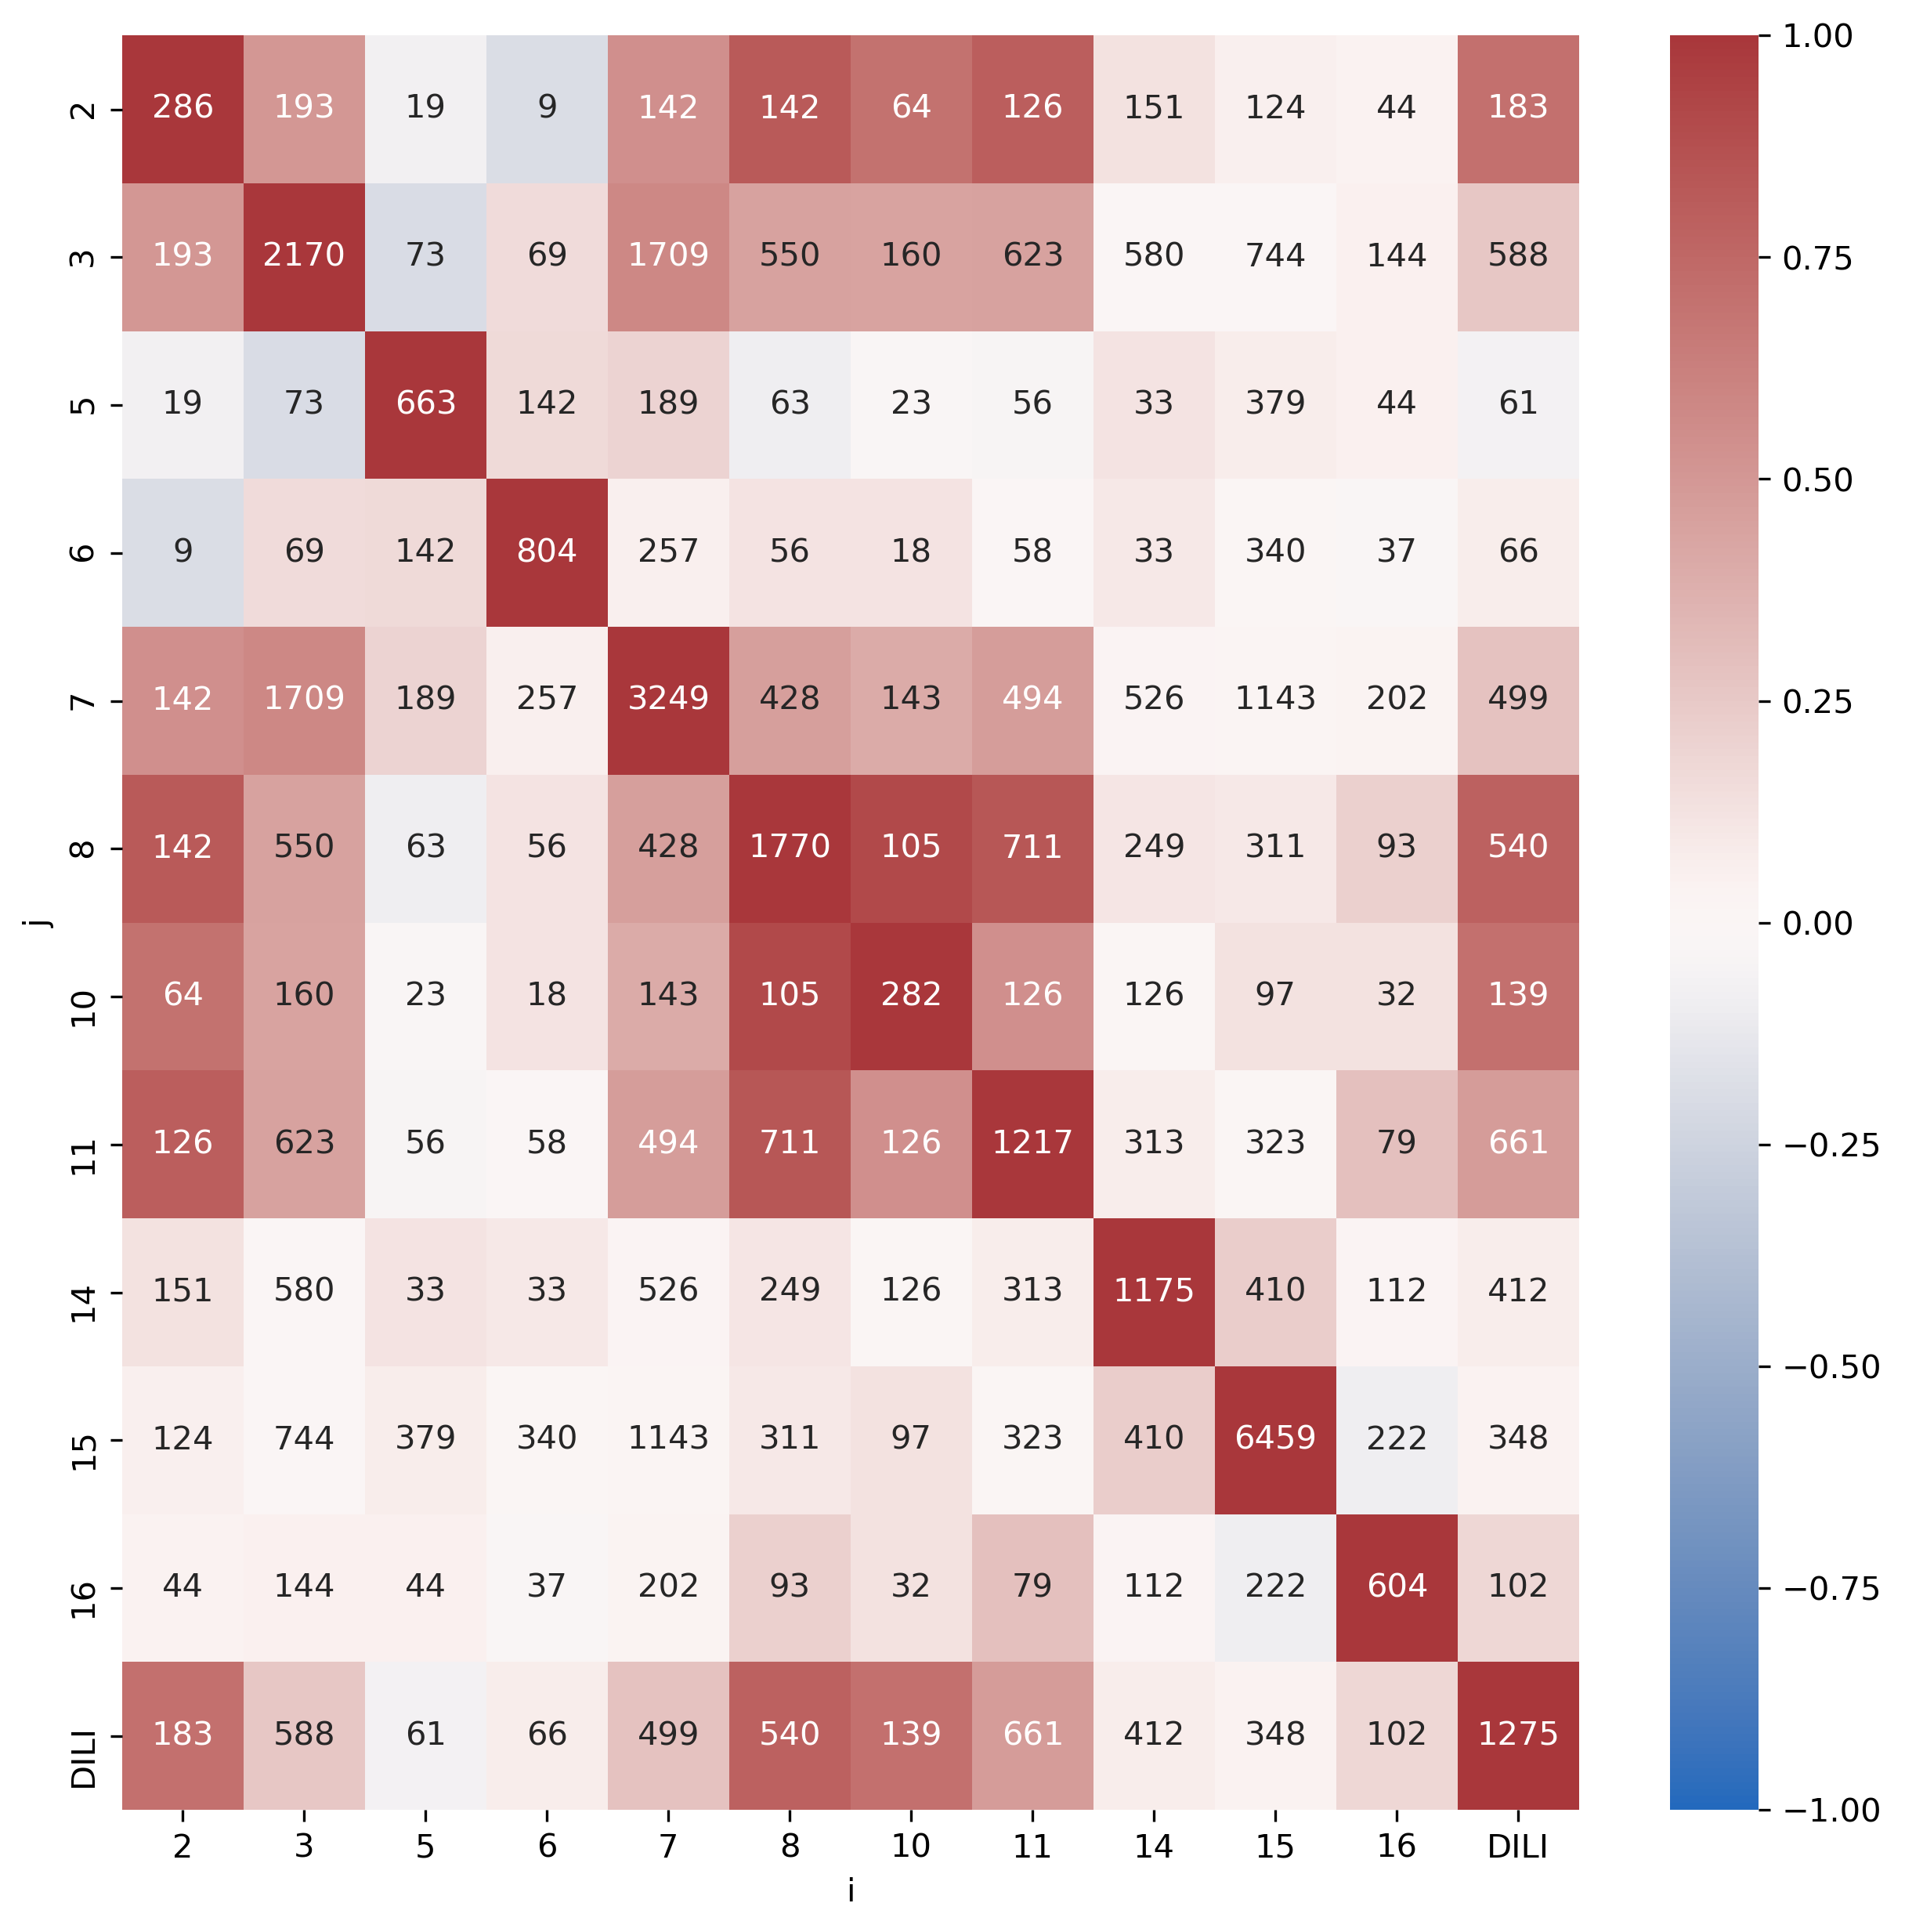

In [18]:
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["cohen_kappa_score"]:
    heatmap = results_kappa1.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
    sns.heatmap(heatmap, annot=annot, cmap="vlag", vmin=-1, vmax=1.00, fmt='g')
    print(metric)
    plt.show()

In [19]:
annot = results_kappa1["cohen_kappa_score"].to_numpy().round(2)
annot = annot.reshape(12,12)
annot

array([[ 1.  ,  0.5 , -0.08, -0.19,  0.54,  0.82,  0.7 ,  0.8 ,  0.13,
         0.06,  0.05,  0.71],
       [ 0.5 ,  1.  , -0.2 ,  0.16,  0.58,  0.45,  0.45,  0.45, -0.01,
        -0.  ,  0.05,  0.26],
       [-0.08, -0.2 ,  1.  ,  0.17,  0.2 , -0.09, -0.03, -0.05,  0.12,
         0.07,  0.05, -0.07],
       [-0.19,  0.16,  0.17,  1.  ,  0.06,  0.12,  0.12, -0.01,  0.1 ,
         0.  , -0.02,  0.07],
       [ 0.54,  0.58,  0.2 ,  0.06,  1.  ,  0.47,  0.4 ,  0.47,  0.02,
         0.02,  0.04,  0.28],
       [ 0.82,  0.45, -0.09,  0.12,  0.47,  1.  ,  0.91,  0.84,  0.11,
         0.1 ,  0.22,  0.78],
       [ 0.7 ,  0.45, -0.03,  0.12,  0.4 ,  0.91,  1.  ,  0.54,  0.  ,
         0.13,  0.13,  0.71],
       [ 0.8 ,  0.45, -0.05, -0.01,  0.47,  0.84,  0.54,  1.  ,  0.07,
         0.01,  0.29,  0.48],
       [ 0.13, -0.01,  0.12,  0.1 ,  0.02,  0.11,  0.  ,  0.07,  1.  ,
         0.23,  0.03,  0.08],
       [ 0.06, -0.  ,  0.07,  0.  ,  0.02,  0.1 ,  0.13,  0.01,  0.23,
         1.  , -0.09

cohen_kappa_score


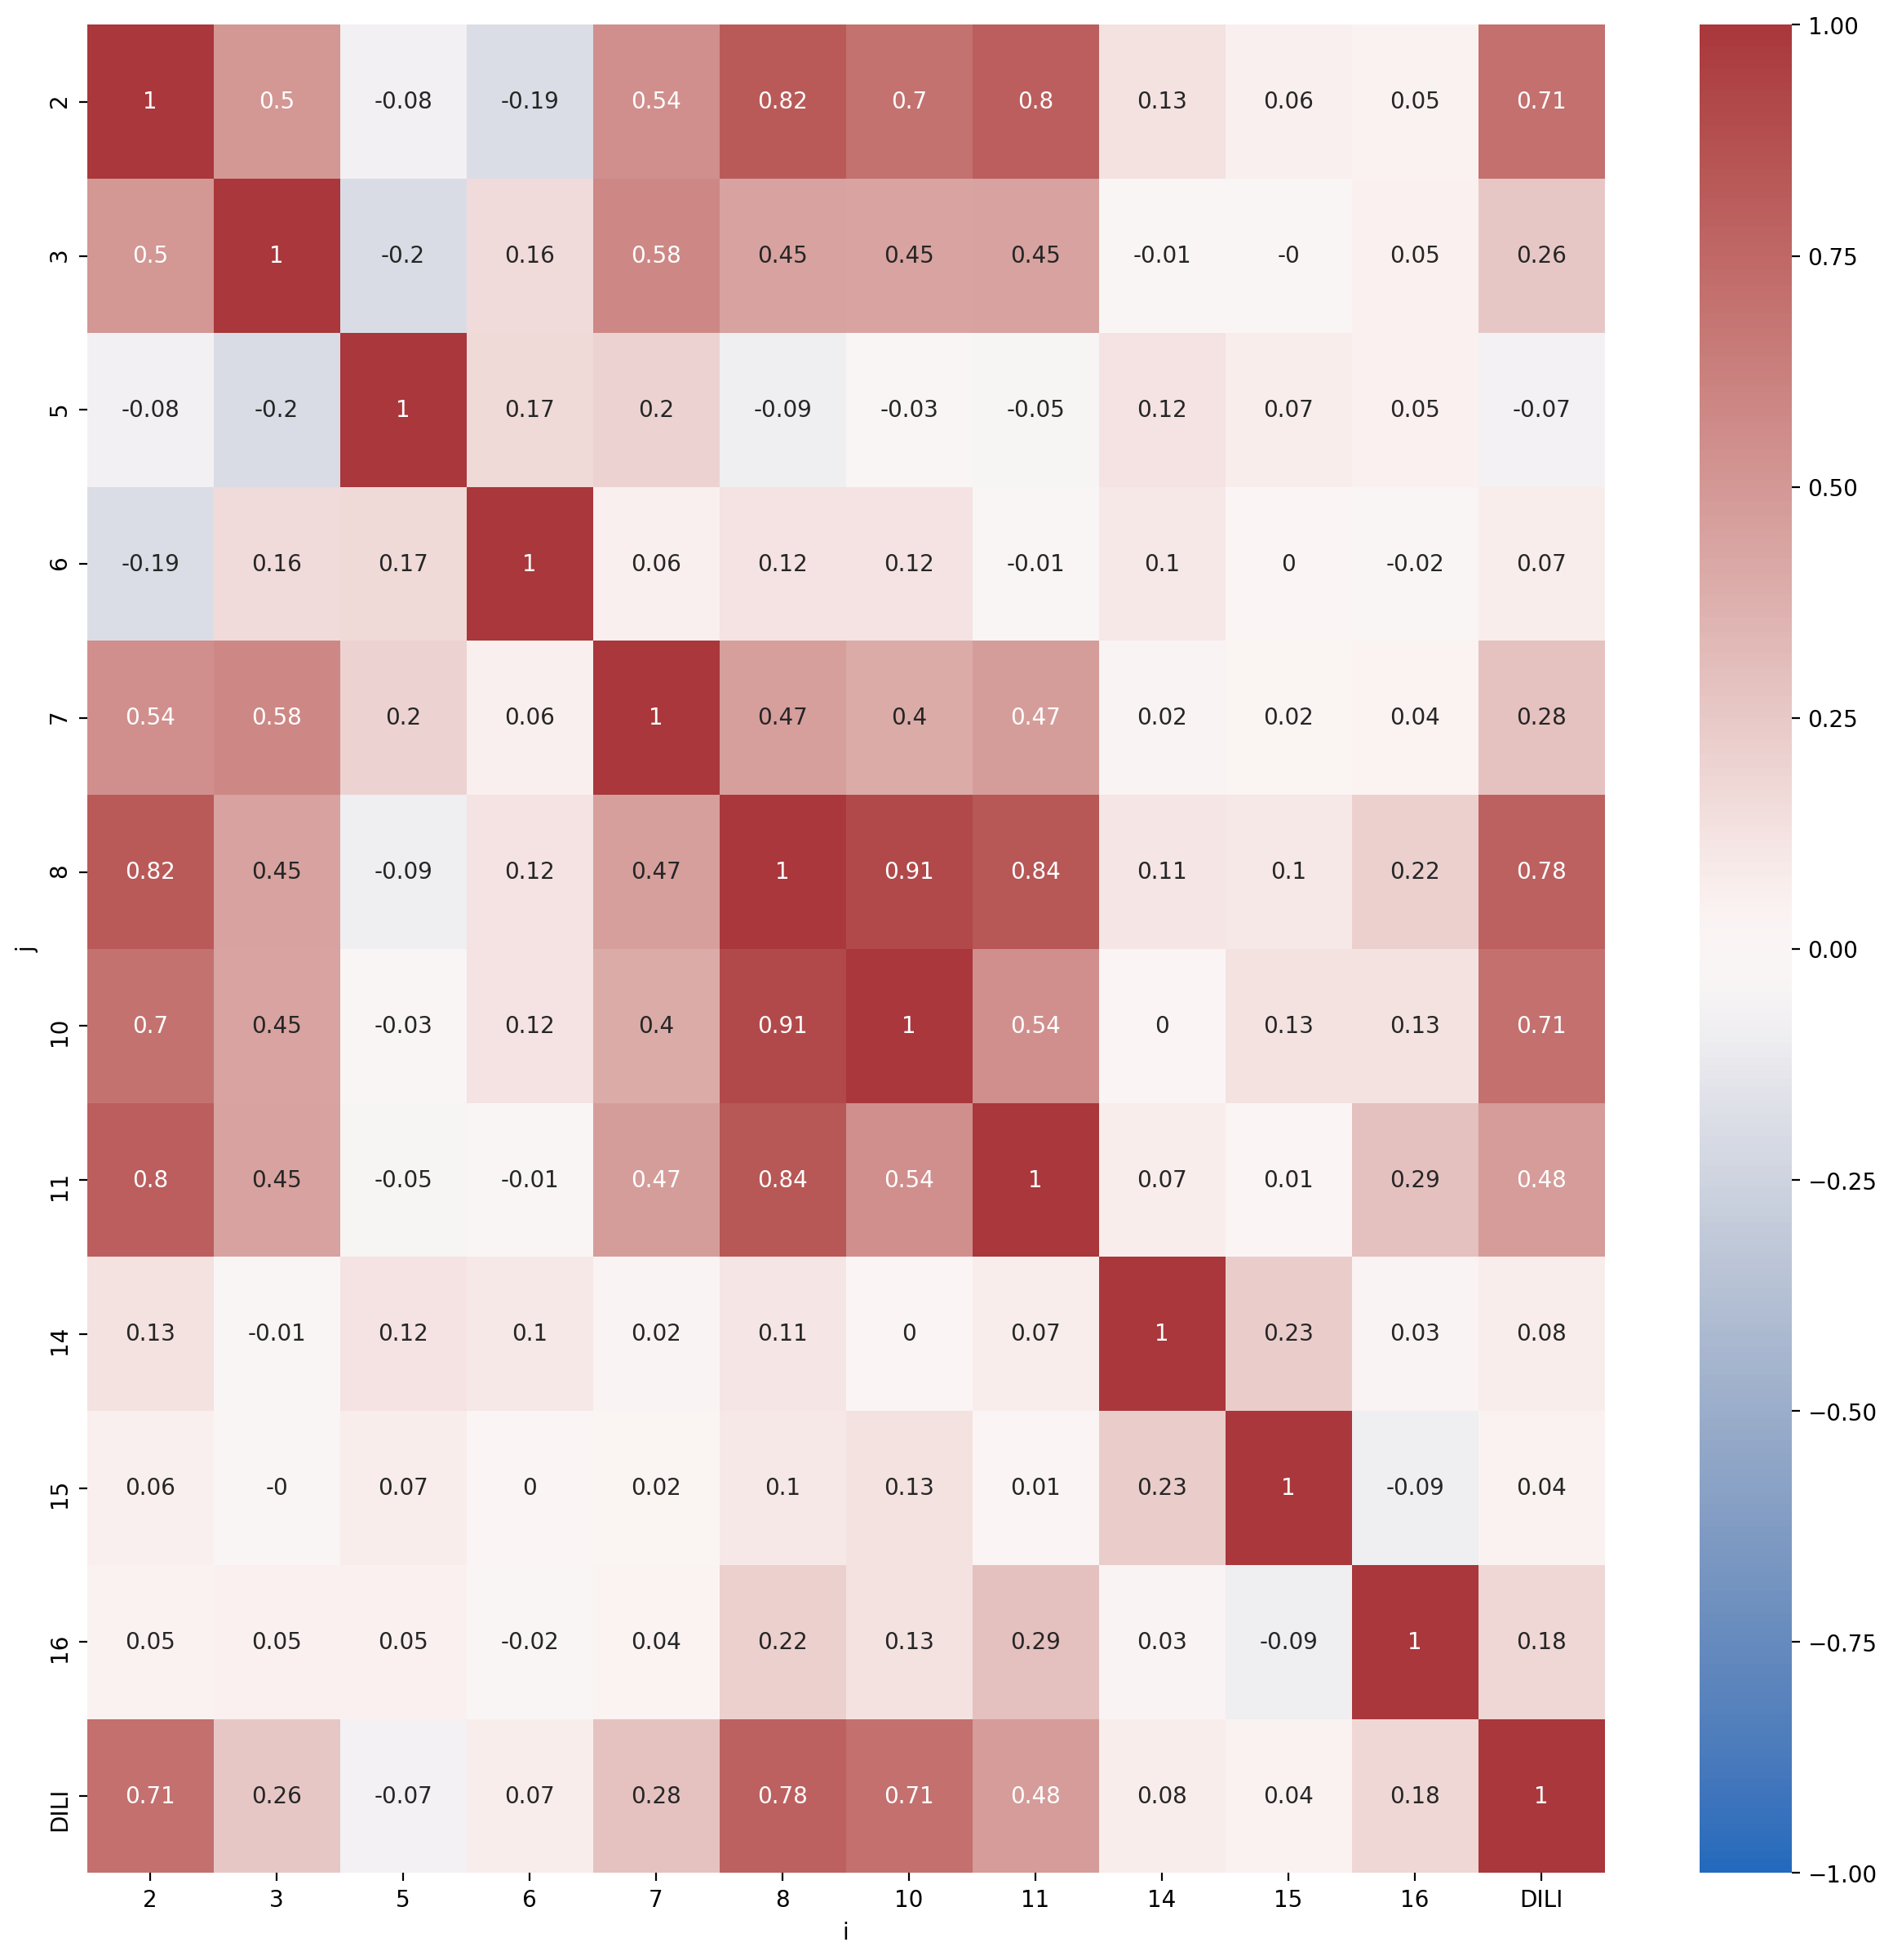

In [20]:
import seaborn as sns

#Anything less than 0.50 is also white (which is worse than a random model)

for metric in ["cohen_kappa_score"]:
    heatmap = results_kappa1.pivot(index='j', columns='i', values=metric)
    fig, ax = plt.subplots(figsize=(15, 15), dpi=200)
    sns.heatmap(heatmap, annot=annot, cmap="vlag", vmin=-1, vmax=1.00, fmt='g')
    print(metric)
    plt.show()